<a href="https://colab.research.google.com/github/poornimadissanayake/movie_recommendation_system/blob/main/Movie_Recommendation_and_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movie Recommendation and Anomaly Detection Using Unsupervised Learning**

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Reading Datasets**

In [3]:
%cd '/content/drive/MyDrive/Challenge Task 1'

import pandas as pd

# Read all datasets
links_df=pd.read_csv('links.csv')
movies_df = pd.read_csv('movies.csv')
ratings_df=pd.read_csv('ratings.csv')
tags_df=pd.read_csv('tags.csv')

# Display the first few rows of each dataframe
#(links_df.head(), movies_df.head(), ratings_df.head(), tags_df.head())

/content/drive/MyDrive/Challenge Task 1


In [4]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [7]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


# **Exploratary Data Analysis (EDA)**

In [8]:
# Basic statistics and data quality assessment for the Movies dataset
movies_info = {
    "Number of Movies": movies_df['movieId'].nunique(),
    "Number of Genres": movies_df['genres'].apply(lambda x: x.split('|')).explode().nunique(),
    "Missing Values": movies_df.isnull().sum()
}

movies_info

{'Number of Movies': 9742,
 'Number of Genres': 20,
 'Missing Values': movieId    0
 title      0
 genres     0
 dtype: int64}

In [9]:
# Basic statistics and data quality assessment for the Ratings dataset
ratings_info = {
    "Number of Users": ratings_df['userId'].nunique(),
    "Number of Movies Rated": ratings_df['movieId'].nunique(),
    "Minimum Rating": ratings_df['rating'].min(),
    "Maximum Rating": ratings_df['rating'].max(),
    "Average Rating": ratings_df['rating'].mean(),
    "Missing Values": ratings_df.isnull().sum()
}

ratings_info

{'Number of Users': 610,
 'Number of Movies Rated': 9724,
 'Minimum Rating': 0.5,
 'Maximum Rating': 5.0,
 'Average Rating': 3.501556983616962,
 'Missing Values': userId       0
 movieId      0
 rating       0
 timestamp    0
 dtype: int64}

In [10]:
#print('The dataset contains: ', len(ratings_df), ' ratings of ', len(movies_df), ' movies.')

In [11]:
# Basic statistics and data quality assessment for the Tags dataset
tags_info = {
    "Number of Users": tags_df['userId'].nunique(),
    "Number of Movies Tagged": tags_df['movieId'].nunique(),
    "Number of Unique Tags": tags_df['tag'].nunique(),
    "Missing Values": tags_df.isnull().sum()
}

tags_info

{'Number of Users': 58,
 'Number of Movies Tagged': 1572,
 'Number of Unique Tags': 1589,
 'Missing Values': userId       0
 movieId      0
 tag          0
 timestamp    0
 dtype: int64}

In [12]:
# Checking for missing values in the Links dataset
links_missing_values = links_df.isnull().sum()

links_missing_values

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [13]:
import matplotlib as mpl
import os.path
import requests
from pathlib import Path

def add_rose_pine_styles(overwrite: bool=False):
    # create style folder if not exists
    stylelib_path = f"{mpl.get_configdir()}/stylelib"
    Path(stylelib_path).mkdir(exist_ok=True)

    # download the styles from the github-repo if they don't exist
    for style in ["rose-pine-dawn.mplstyle", "rose-pine-moon.mplstyle", "rose-pine.mplstyle"]:
        filename = f"{stylelib_path}/{style}"
        if not overwrite and os.path.isfile(filename):
            continue
        # fetch and add to folder
        content = requests.get(f"https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/{style}").text
        with open(filename, "w+") as f:
            f.write(content)

add_rose_pine_styles(overwrite=False)

In [14]:
import matplotlib.pyplot as plt

print(plt.style.available)
# => [...
# 'rose-pine',
# 'rose-pine-dawn',
# 'rose-pine-moon',
# ...]

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'rose-pine', 'rose-pine-dawn', 'rose-pine-moon', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [15]:
from sklearn.datasets import fetch_california_housing

df = fetch_california_housing(as_frame=True)["frame"]

In [15]:
!pip install ptitprince

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 6.5 MB/s eta 0:00:00
  Created wheel for ptitprince: filename=ptitprince-0.2.7-py3-none-any.whl size=10655 sha256=d512afaa6d0c5807e9f23cbe0aa6dc2da1f141201477bf23b7f787a4749fa3f7
  Stored in directory: /root/.cache/pip/wheels/0e/43/31/e76a3bf61865543f076a9d9eb027a740caefb379424ecba4e8
Successfully built ptitprince
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


### **Distribution of Ratings**

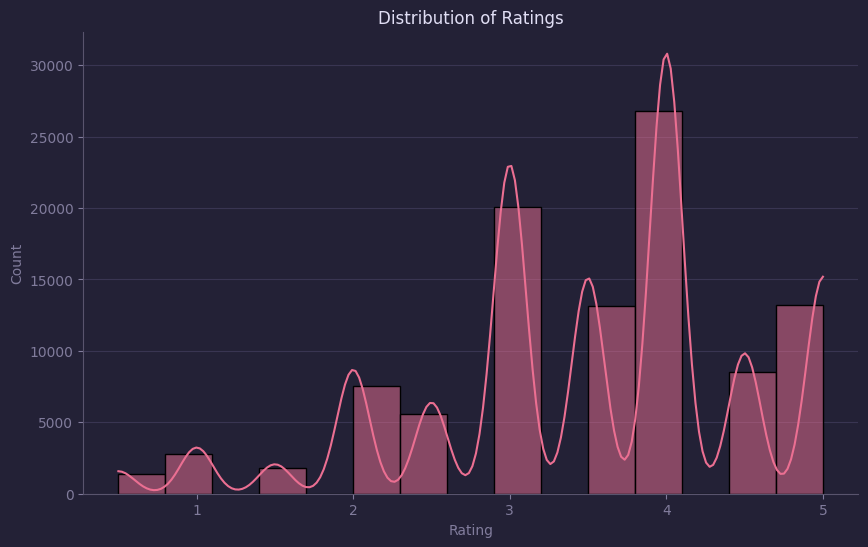

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince as pt

plt.style.use('rose-pine-moon')

# Visualization 1: Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings_df['rating'], bins=15, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### **Combining the Movies and Ratings DataFrame**

In [17]:
df_combined = pd.merge(ratings_df, movies_df, on = 'movieId')
df_combined.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [19]:
#df_combined.shape()

### **genres**

In [20]:
# Create a function to find genres in the dataset

genres = {} # create a dictionary to store different genre values

def find_genres():
    for genre in movies_df['genres']:
        words = genre.split('|')
        for word in words:
            genres[word] = genres.get(word, 0) + 1

find_genres()

In [21]:
#genres

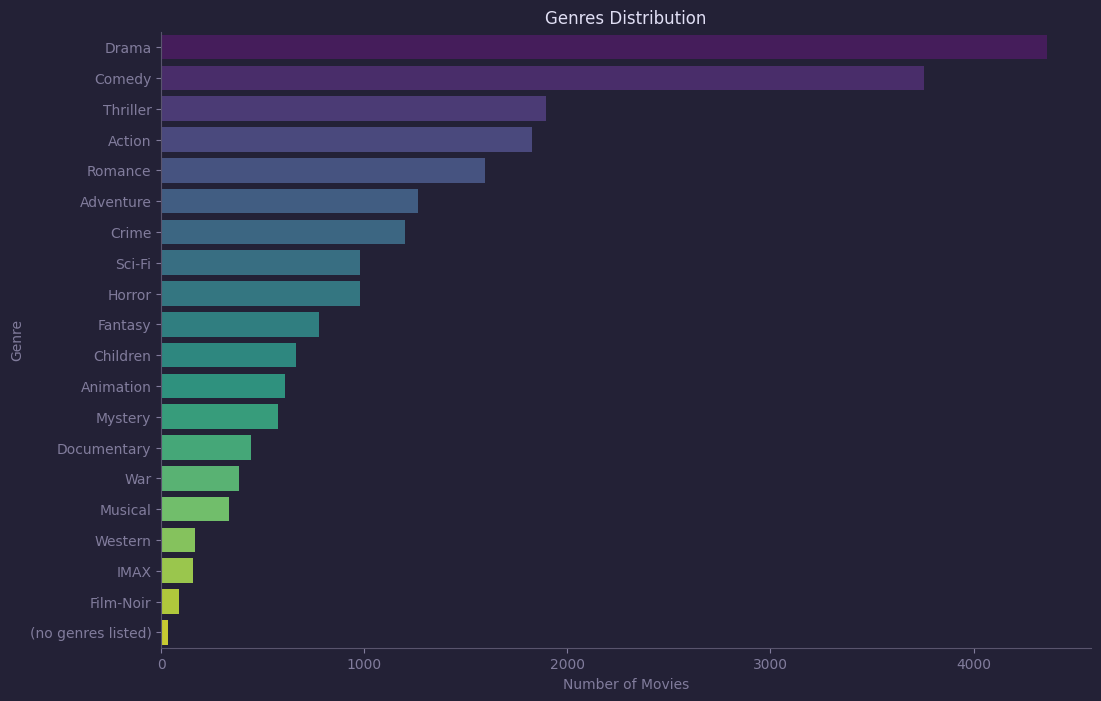

In [22]:
#Genres Distribution
# Splitting the genres and counting each genre's frequency
genre_counts = movies_df['genres'].str.split('|').explode().value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title('Genres Distribution')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

### **Heavily Rated Movies**

In [23]:
df_n_ratings = pd.DataFrame(df_combined.groupby('title')['rating'].mean())
df_n_ratings['total ratings'] = pd.DataFrame(df_combined.groupby('title')['rating'].count())
df_n_ratings.rename(columns = {'rating': 'mean ratings'}, inplace=True)

df_n_ratings.sort_values('total ratings', ascending=False).head(10)

,mean ratings,total ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


Most of these movies stand among the Top 50 movies in the IMDB ratings even today.

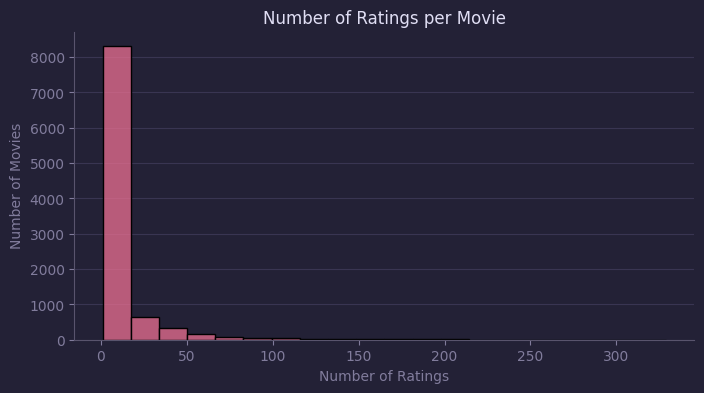

In [24]:
#Number of Ratings per Movie
ratings_per_movie = ratings_df['movieId'].value_counts()
plt.figure(figsize=(8, 4))

sns.histplot(ratings_per_movie, bins=20, kde=False)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
#plt.xscale('log')
plt.show()


We can see that -

Majority of the movies have less than 50 ratings.
The number of movies having more than 100 ratings is very low.
Refer one cell above, we can see that there are only 3 movies with 300+ ratings.

### **Highly Rated Movies**

In [25]:
df_n_ratings.sort_values('mean ratings', ascending=False)

,mean ratings,total ratings
title,,
Gena the Crocodile (1969),5.0,1
True Stories (1986),5.0,1
Cosmic Scrat-tastrophe (2015),5.0,1
Love and Pigeons (1985),5.0,1
Red Sorghum (Hong gao liang) (1987),5.0,1
...,...,...
Don't Look Now (1973),0.5,1
Journey 2: The Mysterious Island (2012),0.5,1
Joe Dirt 2: Beautiful Loser (2015),0.5,1


In [26]:
print('Total no of users that gave rating of 5.0 : ', len(df_n_ratings.loc[df_n_ratings['mean ratings'] == 5]), '\n')
print('Total no of Individual users that gave rating of 5.0 : ', len(df_n_ratings.loc[(df_n_ratings['mean ratings'] == 5)
                                                                           & (df_n_ratings['total ratings'] == 1)]))

Total no of users that gave rating of 5.0 :  296 

Total no of Individual users that gave rating of 5.0 :  289


As you can see there are over 296 users that have rated 5 stars, among which there are 289 individual raters ( only user to rate the movie 5 star)

So, this cannot be the lone factor that should be considered while recommending movies. As this factor only shows the preferences of a particular user.

It would make a good recommendation system if we can use both the factors ( -> Highly Rated Movies and Heavily Rated Movies <- ) together.

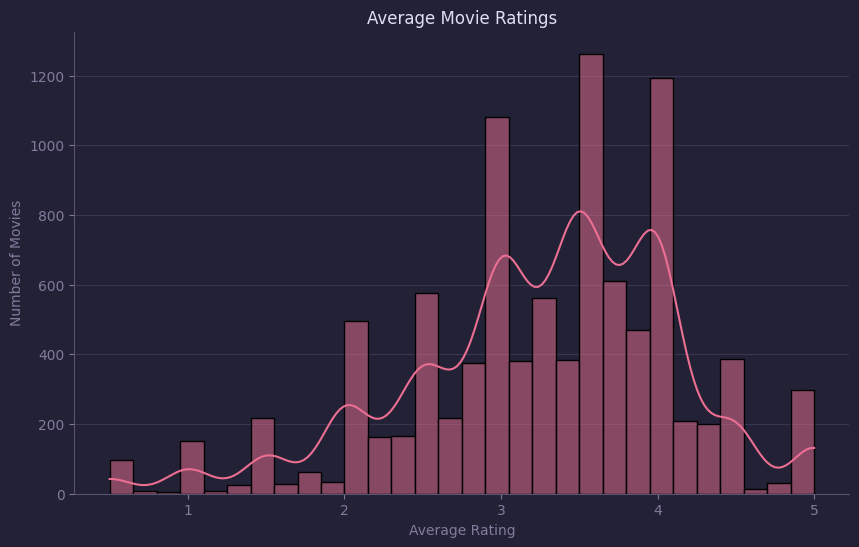

In [27]:
#Average Movie Ratings
#Calculating average ratings for each movie
average_ratings = ratings_df.groupby('movieId')['rating'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(df_n_ratings['mean ratings'], bins=30, kde=True)
plt.title('Average Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.show()

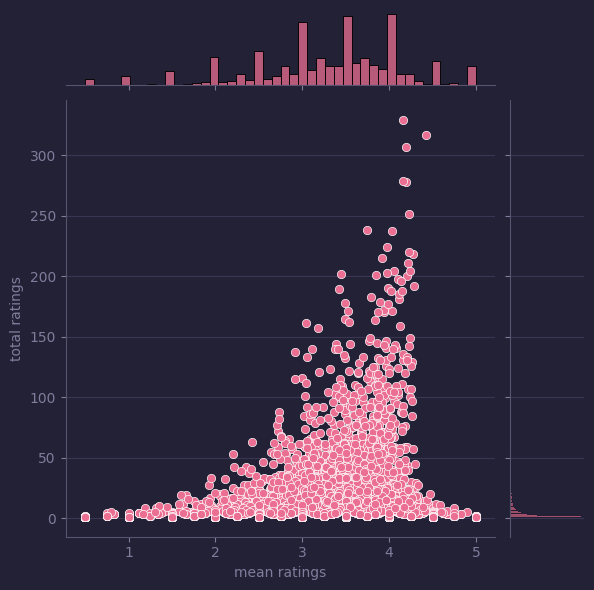

In [28]:
sns.jointplot(x = 'mean ratings', y = 'total ratings', data = df_n_ratings )

## **K-Means Clustering**

Implement K-Means Clustering to group similar movies based on their genres and ratings.

In [29]:
# Split genres into a list
movies_df['genre_list'] = movies_df['genres'].str.split('|')

# One-hot encode the genres
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
movies_df = movies_df.join(pd.DataFrame(mlb.fit_transform(movies_df.pop('genre_list')),columns=mlb.classes_,index=movies_df.index))

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

ratings_df['rating'] = scaler.fit_transform(ratings_df[['rating']])

average_ratings = ratings_df.groupby('movieId')['rating'].mean().reset_index()
average_ratings.rename(columns={'rating': 'average_rating'}, inplace=True)

In [31]:
movie_features = pd.merge(movies_df, average_ratings, on='movieId', how='inner')
movie_features.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0.760207
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.651515
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0.613248
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0.412698
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.571429


In [32]:
features = movie_features.drop(['movieId', 'title', 'genres'], axis=1)
features.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,average_rating
0,0,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.760207
1,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.651515
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.613248
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0.412698
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.571429


In [33]:
from sklearn.cluster import KMeans

cs = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(features)
    cs.append(kmeans.inertia_)

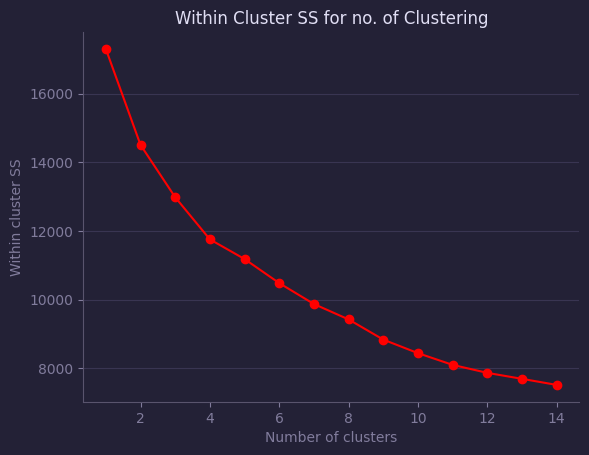

In [34]:
plt.plot(range(1, 15), cs, 'ro-')
plt.title('Within Cluster SS for no. of Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster SS')
plt.show()

In [35]:
from sklearn.metrics import silhouette_score
silhouette_avg = []
for num_clusters in range(2, 12):
 kmeans = KMeans(n_clusters=num_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
 kmeans.fit(features)
 cluster_labels = kmeans.labels_
 silhouette_avg.append(silhouette_score(features, cluster_labels))

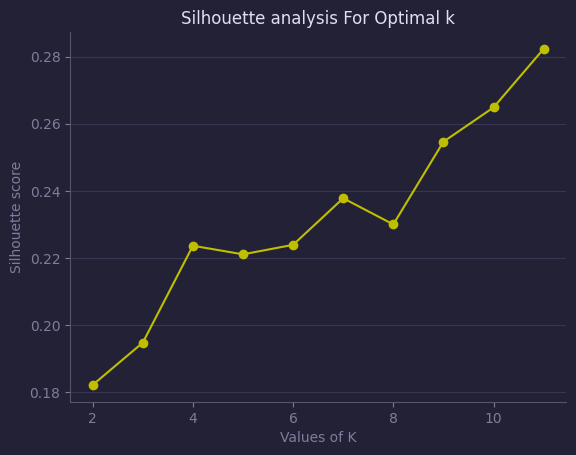

In [36]:
plt.plot(range(2,12),silhouette_avg,'yo-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [37]:
from sklearn.cluster import KMeans

# Applying K-Means
kmeans = KMeans(n_clusters=7, random_state=42)
movie_features['cluster'] = kmeans.fit_predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
# Checking the size of each cluster
cluster_sizes = movie_features['cluster'].value_counts()
cluster_sizes

1    2516
3    2195
2    1562
0    1002
5     948
4     887
6     614
Name: cluster, dtype: int64

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # for 2D visualization
reduced_features = pca.fit_transform(features)

# Adding reduced dimensions to the movie_features dataframe for plotting
movie_features['pc1'] = reduced_features[:, 0]
movie_features['pc2'] = reduced_features[:, 1]

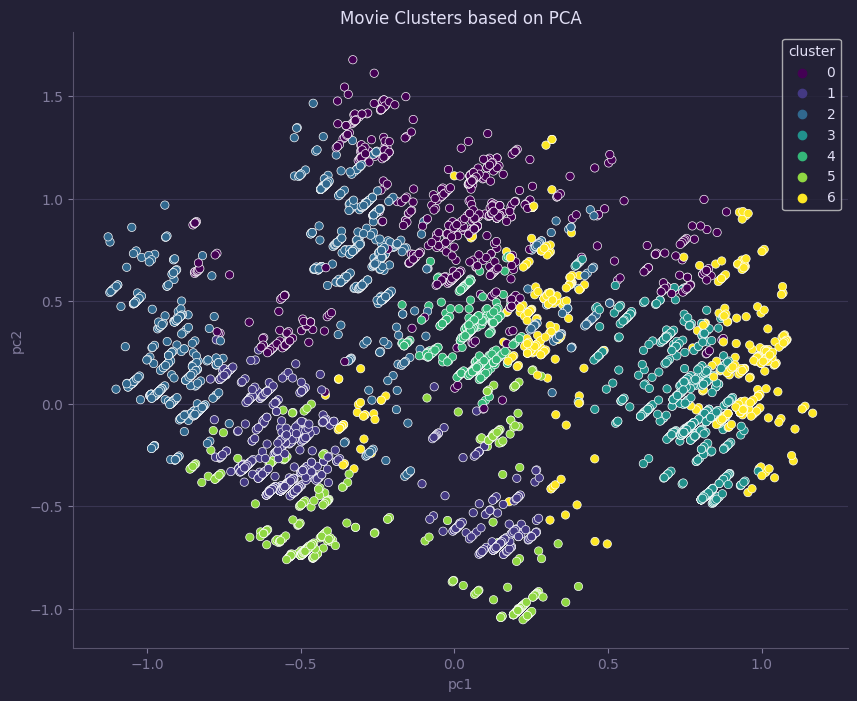

In [40]:
# Scatter plot for PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pc1', y='pc2', hue='cluster', data=movie_features, palette='viridis')
plt.title('Movie Clusters based on PCA')
plt.show()

In [41]:
# Analyzing movies in a specific cluster
cluster_3_movies = movie_features[movie_features['cluster'] == 3]
cluster_3_movies.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,average_rating,cluster,pc1,pc2
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0.613248,3,0.819868,-0.444388
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0.571429,3,0.755775,-0.127013
6,7,Sabrina (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0.596708,3,0.820570,-0.443387
11,12,Dracula: Dead and Loving It (1995),Comedy|Horror,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0.426901,3,0.736483,0.054715
17,18,Four Rooms (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0.711111,3,0.749841,-0.135464


## **Anomaly Detection**

Detect anomalies in user behavior, such as a user giving the maximum rating to all movies or the minimum rating to all movies, which are unusual events.

In [42]:
# Analyze the distribution of ratings
rating_counts = ratings_df['rating'].value_counts().sort_index()
rating_counts

0.000000     1370
0.111111     2811
0.222222     1791
0.333333     7551
0.444444     5550
0.555556    20047
0.666667    13136
0.777778    26818
0.888889     8551
1.000000    13211
Name: rating, dtype: int64

In [43]:
# Find users who have given the maximum or minimum rating to all movies they have rated
max_rating_users = ratings_df.groupby('userId').filter(lambda x: x['rating'].nunique() == 1 and x['rating'].max() == ratings_df['rating'].max())
min_rating_users = ratings_df.groupby('userId').filter(lambda x: x['rating'].nunique() == 1 and x['rating'].min() == ratings_df['rating'].min())

# Group by user and get rating statistics
user_rating_stats = ratings_df.groupby('userId')['rating'].agg(['mean', 'std', 'count', 'min', 'max'])
user_rating_stats

,mean,std,count,min,max
userId,,,,,
1,0.859195,0.177788,232,0.111111,1.000000
2,0.766284,0.179025,29,0.333333,1.000000
3,0.430199,0.464587,39,0.000000,1.000000
4,0.679012,0.292045,216,0.111111,1.000000
5,0.696970,0.220098,44,0.111111,1.000000
...,...,...,...,...,...
606,0.701644,0.160916,1115,0.000000,1.000000
607,0.730244,0.214590,187,0.111111,1.000000
608,0.585372,0.239836,831,0.000000,1.000000


In [44]:
# Users who always give max ratings
max_rating_users_stats = user_rating_stats.loc[max_rating_users['userId'].unique()]

# Users who always give min ratings
min_rating_users_stats = user_rating_stats.loc[min_rating_users['userId'].unique()]

In [45]:
max_rating_users_stats

,mean,std,count,min,max
userId,,,,,
53,1.0,0.0,20,1.0,1.0


In [46]:
min_rating_users_stats

,mean,std,count,min,max
userId,,,,,


## **Movie Recommendation**

- **Collaborative Filtering:** Implement Collaborative Filtering to build a movie recommendation system that recommends movies to a user based on the movies that similar users have liked.
- **Content-Based Filtering:** Implement Content-Based Filtering to recommend movies to a user based on the user's past behavior.

### **Collaborative Filtering**

In [47]:
df_combined.drop(['timestamp'], axis=1, inplace=True)
df_combined.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [48]:
util_mat = df_combined.pivot_table(index = 'userId', columns = 'title', values = 'rating')
util_mat.head(20)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


### **User based Collaborative Filtering**

In [49]:
user_util_matrix = util_mat.copy()

# We will fill the row wise NaN's with the corresponding user's mean ratings, so that we can carry out Pearson correlation.
# Here we assume avg ratings for the movie that is not rated.
user_util_matrix = user_util_matrix.apply(lambda row: row.fillna(row.mean()), axis=1)
user_util_matrix.head(5)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,...,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.000000,4.366379
2,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,...,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276
3,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,...,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897
4,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,...,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556
5,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,...,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364


In [50]:
user_util_matrix.T.corr()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.264516e-03,5.525772e-04,0.048419,0.021847,-0.045497,-6.199672e-03,0.047013,1.950985e-02,-8.754088e-03,...,0.018127,-0.017172,-0.015221,-3.705875e-02,-2.912138e-02,0.012016,0.055261,0.075224,-2.571255e-02,0.010932
2,0.001265,1.000000e+00,-4.975816e-17,-0.017164,0.021796,-0.021051,-1.111357e-02,-0.048085,7.652805e-16,3.011629e-03,...,-0.050551,-0.031581,-0.001688,-1.265569e-15,-6.430371e-16,0.006226,-0.020504,-0.006001,-6.009100e-02,0.024999
3,0.000553,-4.975816e-17,1.000000e+00,-0.011260,-0.031539,0.004800,-2.587070e-16,-0.032471,-4.812885e-16,3.774064e-16,...,-0.004904,-0.016117,0.017749,-8.106536e-16,-1.430628e-03,-0.037289,-0.007789,-0.013001,-1.168878e-16,0.019550
4,0.048419,-1.716402e-02,-1.125978e-02,1.000000,-0.029620,0.013956,5.809139e-02,0.002065,-5.873603e-03,5.159032e-02,...,-0.037687,0.063122,0.027640,-1.378212e-02,4.003747e-02,0.020590,0.014628,-0.037569,-1.788358e-02,-0.000995
5,0.021847,2.179571e-02,-3.153892e-02,-0.029620,1.000000,0.009111,1.011715e-02,-0.012284,7.750436e-16,-3.316512e-02,...,0.015964,0.012427,0.027076,1.246135e-02,-3.627206e-02,0.026319,0.031896,-0.001751,9.382892e-02,-0.000278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.012016,6.225827e-03,-3.728895e-02,0.020590,0.026319,-0.009137,2.832591e-02,0.022277,3.163273e-02,-3.994577e-02,...,0.053683,0.016384,0.098011,6.107833e-02,1.967830e-02,1.000000,0.017927,0.056676,3.842210e-02,0.075464
607,0.055261,-2.050374e-02,-7.789105e-03,0.014628,0.031896,0.045501,3.098070e-02,0.048822,-1.216061e-02,-1.765576e-02,...,0.049059,0.038197,0.049317,2.355180e-03,-2.938114e-02,0.017927,1.000000,0.044514,1.904919e-02,0.021860
608,0.075224,-6.000828e-03,-1.300064e-02,-0.037569,-0.001751,0.021727,2.841409e-02,0.071759,3.278284e-02,-5.199963e-02,...,0.069198,0.051388,0.012801,6.318649e-03,-7.977761e-03,0.056676,0.044514,1.000000,5.071449e-02,0.054454


In [51]:
user_corr_mat = user_util_matrix.T.corr()
corr_user_1 = user_corr_mat.iloc[0]

In [52]:
corr_user_1.sort_values(ascending=False, inplace=True)
corr_user_1

userId
1      1.000000
301    0.124799
597    0.102631
414    0.101348
477    0.099217
         ...   
71    -0.082932
370   -0.086678
501   -0.090018
579   -0.105003
53          NaN
Name: 1, Length: 610, dtype: float64

In [53]:
# NaN values are generated in corr() as the std dev is zero, which is required in calculating Pearson Similarity.
corr_user_1.dropna(inplace = True)

# Neglect the 1st corr value as it is user1 itself
top50_corr_users = corr_user_1[1:51]

In [54]:
df_combined[ df_combined['userId'] == 1]

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
215,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance
267,1,6,4.0,Heat (1995),Action|Crime|Thriller
369,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
572,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...
16056,1,3744,4.0,Shaft (2000),Action|Crime|Thriller
16075,1,3793,5.0,X-Men (2000),Action|Adventure|Sci-Fi
16208,1,3809,4.0,What About Bob? (1991),Comedy
16243,1,4006,4.0,Transformers: The Movie (1986),Adventure|Animation|Children|Sci-Fi


User1 has not rated 32 movie. So, let's calculate what ratings user 1 would give to the movie with the help of similarrity vector. And based on that rating, we can compare it with a threshold rating. If the rating is higher it will be visible to the active user in his/her recommended list.

In [55]:
df_n_ratings.loc[['Twelve Monkeys (a.k.a. 12 Monkeys) (1995)']]

,mean ratings,total ratings
title,,
Twelve Monkeys (a.k.a. 12 Monkeys) (1995),3.983051,177


In [56]:
top50_users = top50_corr_users.keys()

count = 0
users = list()
for user in top50_users:
    if df_combined[ (df_combined['userId'] == user) & (df_combined['movieId'] == 32) ]['rating'].sum()  :
        count +=1
        users.append(user)

print(count)

30


There are 30 similar users among the Top-50 similar users that have rated the movie 32 - "The Twelve Monkeys".

Now, let's calculate the rating user 1 would give to the movie,

Predicted rating = sum of [ (weights) * (ratings) ] / sum of (weights)

Here, weights is the correlation of the corresponding user with the first user.

In [57]:
# Define a function to calculate what user1 will rate the movie
# Use Weighted average of k similar users

def predict_rating():
    sum_similarity = 0
    weighted_ratings = 0
    for user in users:
        weighted_ratings += top50_corr_users.loc[user] * df_combined[ (df_combined['userId'] == user) &
                                                              (df_combined['movieId'] == 32) ]['rating'].sum()
        sum_similarity += top50_corr_users.loc[user]

    if sum_similarity != 0:
        print(weighted_ratings / sum_similarity)
    else:
        print("No similar users found or sum of similarities is 0.")

predict_rating()

4.1368953015974315


Since the rating is quite good, this movie can recommend to the 1st user

### **Item Based Collaborative Filtering**

In [58]:
# Let's find similar movies to jurassic Park
df_n_ratings.loc[['Jurassic Park (1993)']]

,mean ratings,total ratings
title,,
Jurassic Park (1993),3.75,238


In [59]:
item_util_matrix = util_mat.copy()
item_util_matrix.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [60]:
# We will fill the column wise NaN's with the corresponding movie's mean ratings, so that we can carry out Pearson correlation.
# Here we assume avg ratings for the user that has not a rated movie.

item_util_matrix = item_util_matrix.apply(lambda col : col.fillna(col.mean()), axis=0)
item_util_matrix.head(5)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,4.000000,1.0
2,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
3,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
4,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
5,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0


In [61]:
item_util_matrix.isna().sum().sum()

0

This signifies that every Movie is rated by atleast 1 user.

In [62]:
item_corr_matrix = item_util_matrix.corr()
item_corr_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,1.000000e+00,NaN,-2.470228e-17,NaN,-6.783236e-16,-4.090781e-16,...,NaN,1.491400e-15,-2.970631e-18,NaN,NaN,-1.174172e-16,-4.643126e-16,-1.457468e-15,2.901144e-15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ (1999),NaN,NaN,NaN,NaN,-1.174172e-16,NaN,6.069910e-02,NaN,-7.527708e-02,2.947366e-02,...,NaN,-1.447002e-15,-3.196632e-16,NaN,NaN,1.000000e+00,3.784587e-02,1.243849e-15,-3.410933e-02,NaN
xXx (2002),NaN,NaN,NaN,NaN,-4.643126e-16,NaN,-3.527098e-03,NaN,1.558884e-01,2.511177e-01,...,NaN,-2.067568e-01,-4.854206e-03,NaN,NaN,3.784587e-02,1.000000e+00,2.449296e-01,1.854832e-02,NaN
xXx: State of the Union (2005),NaN,NaN,NaN,NaN,-1.457468e-15,NaN,6.027298e-16,NaN,1.107823e-01,-1.311693e-15,...,NaN,-2.014024e-01,7.715167e-02,NaN,NaN,1.243849e-15,2.449296e-01,1.000000e+00,1.034849e-15,NaN


In [63]:
jurassic_park_corr = item_corr_matrix['Jurassic Park (1993)']
jurassic_park_corr = jurassic_park_corr.sort_values(ascending=False)
jurassic_park_corr.dropna(inplace=True)

In [64]:
movies_similar_to_jurassic_park = pd.DataFrame(data=jurassic_park_corr.values, columns=['Correlation'],
                                               index = jurassic_park_corr.index)
movies_similar_to_jurassic_park = movies_similar_to_jurassic_park.join(df_n_ratings['total ratings'])

movies_similar_to_jurassic_park = movies_similar_to_jurassic_park[1:]
movies_similar_to_jurassic_park[ movies_similar_to_jurassic_park['total ratings'] > 100 ].sort_values(ascending=False,
                                                                                          by=['Correlation']).head(10)

,Correlation,total ratings
title,,
"Fugitive, The (1993)",0.324717,190
Independence Day (a.k.a. ID4) (1996),0.263629,202
Mission: Impossible (1996),0.258080,162
Ghostbusters (a.k.a. Ghost Busters) (1984),0.256527,120
Indiana Jones and the Temple of Doom (1984),0.239826,108
Die Hard (1988),0.239294,145
Aladdin (1992),0.227711,183
Braveheart (1995),0.222085,237
Speed (1994),0.220720,171


### **Content-Based Filtering**

In [65]:
import pandas as pd
import numpy as np

movies = pd.read_csv('movies.csv')

In [66]:
# the function to extract titles
def extract_title(title):
   year = title[len(title)-5:len(title)-1]

   if year.isnumeric():
      title_no_year = title[:len(title)-7]
      return title_no_year
   else:
      return title

# the function to extract years
def extract_year(title):
   year = title[len(title)-5:len(title)-1]

   # some movies do not have the info about year in the column title. So, we should take care of the case as well.
   if year.isnumeric():
      return int(year)
   else:
      return np.nan

# change the column name from title to title_year
movies.rename(columns={'title':'title_year'}, inplace=True)

# remove leading and ending whitespaces in title_year
movies['title_year'] = movies['title_year'].apply(lambda x: x.strip())

# create the columns for title and year
movies['title'] = movies['title_year'].apply(extract_title)
movies['year'] = movies['title_year'].apply(extract_year)

In [67]:
r,c = movies[movies['genres']=='(no genres listed)'].shape
print('The number of movies which do not have info about genres:',r)

The number of movies which do not have info about genres: 34


In [68]:
# remove the movies without genre information and reset the index
movies = movies[~(movies['genres']=='(no genres listed)')].reset_index(drop=True)

In [69]:
# remove '|' in the genres column
movies['genres'] = movies['genres'].str.replace('|',' ')
movies.head()

<ipython-input-69-5d9a200cd210>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies['genres'] = movies['genres'].str.replace('|',' ')


,movieId,title_year,genres,title,year
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Toy Story,1995.0
1,2,Jumanji (1995),Adventure Children Fantasy,Jumanji,1995.0
2,3,Grumpier Old Men (1995),Comedy Romance,Grumpier Old Men,1995.0
3,4,Waiting to Exhale (1995),Comedy Drama Romance,Waiting to Exhale,1995.0
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995.0


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

# change 'Sci-Fi' to 'SciFi' and 'Film-Noir' to 'Noir'
movies['genres'] = movies['genres'].str.replace('Sci-Fi','SciFi')
movies['genres'] = movies['genres'].str.replace('Film-Noir','Noir')

# create an object for TfidfVectorizer
tfidf_vector = TfidfVectorizer(stop_words='english')
# apply the object to the genres column
tfidf_matrix = tfidf_vector.fit_transform(movies['genres'])

In [71]:
tfidf_matrix.shape

(9708, 19)

The tfidf_matrix is the matrix with 9708 rows(movie) and 19 columns(genre).

In [72]:
print(list(enumerate(tfidf_vector.get_feature_names_out())))

[(0, 'action'), (1, 'adventure'), (2, 'animation'), (3, 'children'), (4, 'comedy'), (5, 'crime'), (6, 'documentary'), (7, 'drama'), (8, 'fantasy'), (9, 'horror'), (10, 'imax'), (11, 'musical'), (12, 'mystery'), (13, 'noir'), (14, 'romance'), (15, 'scifi'), (16, 'thriller'), (17, 'war'), (18, 'western')]


In [73]:
from sklearn.metrics.pairwise import linear_kernel

# create the cosine similarity matrix
sim_matrix = linear_kernel(tfidf_matrix,tfidf_matrix)
print(sim_matrix)

[[1.         0.8136036  0.15259961 ... 0.         0.42114166 0.26738778]
 [0.8136036  1.         0.         ... 0.         0.         0.        ]
 [0.15259961 0.         1.         ... 0.         0.         0.57070525]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.42114166 0.         0.         ... 0.         1.         0.        ]
 [0.26738778 0.         0.57070525 ... 0.         0.         1.        ]]


**Create a Movie Recommender**

In [77]:
!pip install fuzzywuzzy

In [78]:
!pip install python-Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 17.1 MB/s eta 0:00:00


In [79]:
from fuzzywuzzy import fuzz

# create a function to find the closest title
def matching_score(a,b):
   return fuzz.ratio(a,b)

In [80]:
# a function to convert index to title_year
def get_title_year_from_index(index):
   return movies[movies.index == index]['title_year'].values[0]

# a function to convert index to title
def get_title_from_index(index):
   return movies[movies.index == index]['title'].values[0]

# a function to convert title to index
def get_index_from_title(title):
   return movies[movies.title == title].index.values[0]

# a function to return the most similar title to the words a user type
def find_closest_title(title):
   leven_scores = list(enumerate(movies['title'].apply(matching_score, b=title)))
   sorted_leven_scores = sorted(leven_scores, key=lambda x: x[1], reverse=True)
   closest_title = get_title_from_index(sorted_leven_scores[0][0])
   distance_score = sorted_leven_scores[0][1]
   return closest_title, distance_score

In [81]:
def contents_based_recommender(movie_user_likes, how_many):
   closest_title, distance_score = find_closest_title(movie_user_likes)

   # When a user does not make misspellings
   if distance_score == 100:
      movie_index = get_index_from_title(closest_title)
      movie_list = list(enumerate(sim_matrix[int(movie_index)]))

      # remove the typed movie itself
      similar_movies = list(filter(lambda x:x[0] != int(movie_index), sorted(movie_list,key=lambda x:x[1], reverse=True)))

      print('Here\'s the list of movies similar to '+'\033[1m'+str(closest_title)+'\033[0m'+'.\n')
      for i,s in similar_movies[:how_many]:
         print(get_title_year_from_index(i))

   # When a user makes misspellings
   else:
      print('Did you mean '+'\033[1m'+str(closest_title)+'\033[0m'+'?','\n')
      movie_index = get_index_from_title(closest_title)
      movie_list = list(enumerate(sim_matrix[int(movie_index)]))
      similar_movies = list(filter(lambda x:x[0] != int(movie_index), sorted(movie_list,key=lambda x:x[1], reverse=True)))
      print('Here\'s the list of movies similar to '+'\033[1m'+str(closest_title)+'\033[0m'+'.\n')
      for i,s in similar_movies[:how_many]:
         print(get_title_year_from_index(i))

In [82]:
contents_based_recommender('Monsters, Inc.', 20)

Here's the list of movies similar to Monsters, Inc..

Toy Story (1995)
Antz (1998)
Toy Story 2 (1999)
Adventures of Rocky and Bullwinkle, The (2000)
Emperor's New Groove, The (2000)
Wild, The (2006)
Shrek the Third (2007)
Tale of Despereaux, The (2008)
Asterix and the Vikings (Astérix et les Vikings) (2006)
Turbo (2013)
The Good Dinosaur (2015)
Moana (2016)
Inside Out (2015)
Black Cauldron, The (1985)
Lord of the Rings, The (1978)
We're Back! A Dinosaur's Story (1993)
Atlantis: The Lost Empire (2001)
Land Before Time, The (1988)
Pokemon 4 Ever (a.k.a. Pokémon 4: The Movie) (2002)
Sinbad: Legend of the Seven Seas (2003)


In [83]:
contents_based_recommender('Tis the Season for Love', 20)

Did you mean 'Tis the Season for Love? 

Here's the list of movies similar to 'Tis the Season for Love.

Jack and Sarah (1995)
Hustler White (1996)
Kama Sutra: A Tale of Love (1996)
Love Jones (1997)
Love and Other Catastrophes (1996)
Temptress Moon (Feng Yue) (1996)
Fall (1997)
Meet Joe Black (1998)
Message in a Bottle (1999)
Autumn Tale, An (Conte d'automne) (1998)
Against All Odds (1984)
House of Mirth, The (2000)
Brown Sugar (2002)
Open Hearts (Elsker dig for evigt) (2002)
Dirty Dancing: Havana Nights (2004)
Raise Your Voice (2004)
Emma (1996)
Paris, I Love You (Paris, je t'aime) (2006)
Before We Go (2014)
Anything for Love (2016)
